In [2]:
pwd

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Project-Diabetes dataset'

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('precision', 5)
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cd dataset_diabetes

/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Project-Diabetes dataset/dataset_diabetes


In [5]:
#Importing data into a pandas dataframe
#Replacing all "?" (missing values) with NaN
diabetic_df = pd.read_table('diabetic_data.csv',na_values='?',sep=',')
diabetic_df.head()

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetic_df.shape

(101766, 50)

In [7]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.01766e+05,1.01766e+05,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000,101766.00000
mean,1.65202e+08,5.43304e+07,2.02401,3.71564,5.75444,4.39599,43.09564,1.33973,16.02184,0.36936,0.19784,0.63557,7.42261
std,1.02640e+08,3.86964e+07,1.44540,5.28017,4.06408,2.98511,19.67436,1.70581,8.12757,1.26727,0.93047,1.26286,1.93360
min,1.25220e+04,1.35000e+02,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
25%,8.49612e+07,2.34132e+07,1.00000,1.00000,1.00000,2.00000,31.00000,0.00000,10.00000,0.00000,0.00000,0.00000,6.00000
50%,1.52389e+08,4.55051e+07,1.00000,1.00000,7.00000,4.00000,44.00000,1.00000,15.00000,0.00000,0.00000,0.00000,8.00000
75%,2.30271e+08,8.75459e+07,3.00000,4.00000,7.00000,6.00000,57.00000,2.00000,20.00000,0.00000,0.00000,1.00000,9.00000
max,4.43867e+08,1.89503e+08,8.00000,28.00000,25.00000,14.00000,132.00000,6.00000,81.00000,42.00000,76.00000,21.00000,16.00000


In [8]:
diabetic_df.describe(include=[np.object])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [9]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
diabetic_df.get_dtype_counts()
#13 numerical attributes and 37 categorical attributes

int64     13
object    37
dtype: int64

In [11]:
diabetic_df.patient_nbr.value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, dtype

In [12]:
#Dropping all redundant Patient numbers and keeping only ONE encounter for each patient
diabetic_df.drop_duplicates(['patient_nbr'],keep='first',inplace=True)

In [13]:
diabetic_df.shape

(71518, 50)

In [14]:
diabetic_df.discharge_disposition_id.value_counts()

1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [15]:
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 11]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 13]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 14]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 19]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 20]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 21]
diabetic_df.shape

(69973, 50)

In [16]:
#Handling missing values
diabetic_df.count(axis=0)

encounter_id                69973
patient_nbr                 69973
race                        68055
gender                      69973
age                         69973
weight                       2788
admission_type_id           69973
discharge_disposition_id    69973
admission_source_id         69973
time_in_hospital            69973
payer_code                  39558
medical_specialty           36334
num_lab_procedures          69973
num_procedures              69973
num_medications             69973
number_outpatient           69973
number_emergency            69973
number_inpatient            69973
diag_1                      69963
diag_2                      69680
diag_3                      68749
number_diagnoses            69973
max_glu_serum               69973
A1Cresult                   69973
metformin                   69973
repaglinide                 69973
nateglinide                 69973
chlorpropamide              69973
glimepiride                 69973
acetohexamide 

In [17]:
#Dropping the 'weight' column as we have only 3% of the values. There are 98569 missing values.
diabetic_df = diabetic_df.drop('weight',axis=1,inplace=False)
diabetic_df.shape

(69973, 49)

In [18]:
#Dropping the column - payer_code as there are more than 50% missing values. And payer_code not relevant to the outcome.
diabetic_df.drop('payer_code',axis=1,inplace=True)

In [19]:
diabetic_df.shape

(69973, 48)

In [20]:
#Counts of unique values for the 'Race' column
diabetic_df.race.value_counts(dropna=False)
#NaN -- 1918

Caucasian          52292
AfricanAmerican    12625
NaN                 1918
Hispanic            1500
Other               1150
Asian                488
Name: race, dtype: int64

In [21]:
#Filling the NA values with 'missing' value for medical_speciality and race columns 
diabetic_df.medical_specialty.fillna('missing',inplace=True)
diabetic_df.shape

(69973, 48)

In [22]:
diabetic_df.race.fillna('missing',inplace=True)
diabetic_df.count(axis=0)

encounter_id                69973
patient_nbr                 69973
race                        69973
gender                      69973
age                         69973
admission_type_id           69973
discharge_disposition_id    69973
admission_source_id         69973
time_in_hospital            69973
medical_specialty           69973
num_lab_procedures          69973
num_procedures              69973
num_medications             69973
number_outpatient           69973
number_emergency            69973
number_inpatient            69973
diag_1                      69963
diag_2                      69680
diag_3                      68749
number_diagnoses            69973
max_glu_serum               69973
A1Cresult                   69973
metformin                   69973
repaglinide                 69973
nateglinide                 69973
chlorpropamide              69973
glimepiride                 69973
acetohexamide               69973
glipizide                   69973
glyburide     

In [23]:
diabetic_df.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,69973,69973,69973,69973,69963,69680,68749,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973
unique,6,3,10,71,694,723,756,4,4,4,4,4,4,4,2,4,4,2,4,4,3,4,2,2,1,1,4,4,2,1,2,2,2,2,3
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,52292,37229,17750,33639,5209,4996,8980,66625,57128,55070,69056,69482,69902,66276,69972,60966,62198,69956,64710,65312,69773,69953,69970,69943,69973,69973,34258,69477,69966,69973,69971,69972,38482,53293,41474


In [24]:
#Eliminating 'NaNs' from diag_1,diag_2 and diag_3 columns
diabetic_df.dropna(axis=0,inplace=True)
diabetic_df.shape

(68689, 48)

In [25]:
diabetic_df.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689
unique,6,3,10,71,692,716,756,4,4,4,4,4,4,4,2,4,4,2,4,4,3,4,2,2,1,1,4,4,2,1,2,2,2,2,3
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,51439,36587,17610,33266,5180,4556,8965,65416,56229,54038,67778,68202,68620,65033,68688,59784,61028,68672,63493,64082,68492,68669,68686,68661,68689,68689,33751,68202,68682,68689,68687,68688,37742,52281,40534


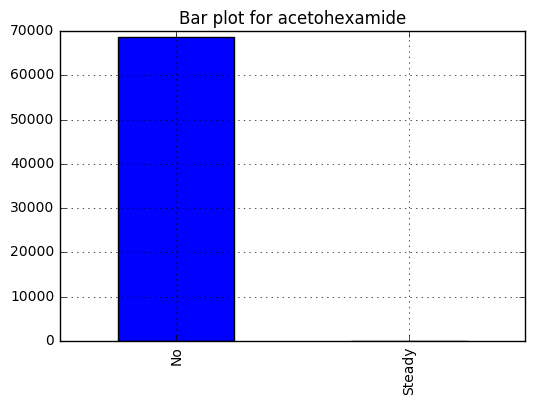

In [26]:
#Dropping columns which have only 1 unique value -- acetohexamide,examide,citoglipton,glimepiride-pioglitazone
#All values in the column correspond to NO

diabetic_df.acetohexamide.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for acetohexamide')

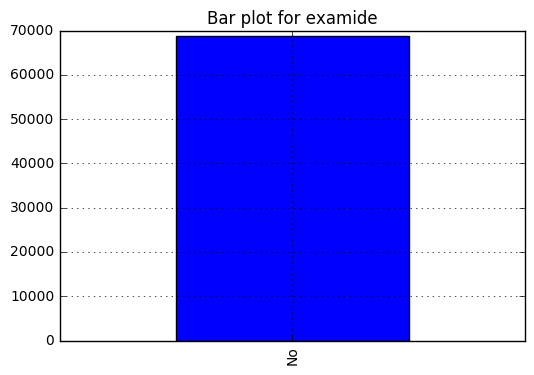

In [27]:
diabetic_df.examide.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for examide')

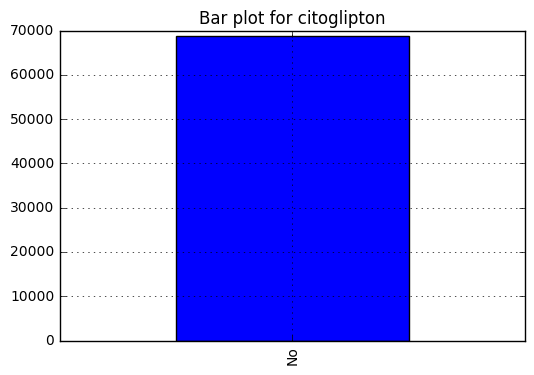

In [28]:
diabetic_df.citoglipton.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for citoglipton')

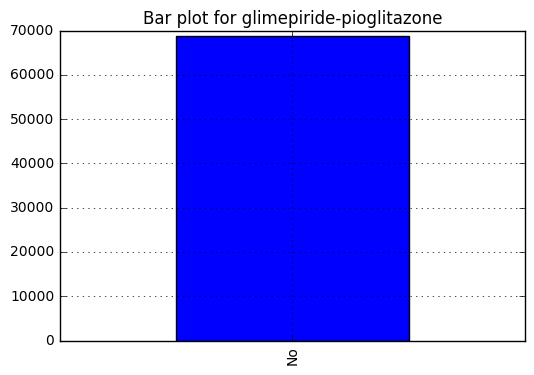

In [29]:
diabetic_df['glimepiride-pioglitazone'].value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for glimepiride-pioglitazone')

In [30]:
#Examining the outcome variable
diabetic_df.readmitted.value_counts()

NO     40534
>30    21944
<30     6211
Name: readmitted, dtype: int64

In [31]:
diabetic_df = diabetic_df.drop(['acetohexamide','examide','citoglipton','glimepiride-pioglitazone'],axis=1)
diabetic_df.shape

(68689, 44)

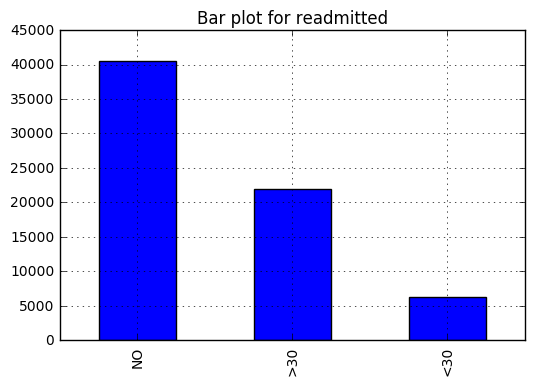

In [32]:
diabetic_df.readmitted.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for readmitted')

Defining the readmission attribute (outcome) as having two values: "readmitted" if the patient was readmitted within 30 days of discharge or “NO,”  no readmission at all. Dropping rows who got readmitted >30 days.


In [33]:
df_40k = diabetic_df[diabetic_df.readmitted != '>30']

In [34]:
df_40k.shape

(46745, 44)

In [35]:
df_40k.readmitted.value_counts()

NO     40534
<30     6211
Name: readmitted, dtype: int64

In [36]:
df_Y = df_40k['readmitted']
df_Y.shape

(46745,)

In [37]:
df_X = df_40k.drop('readmitted',inplace=False,axis=1)
df_X.shape

(46745, 43)

In [38]:
df_X.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,missing,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,missing,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes


In [39]:
df_X.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [40]:
df_X.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745,46745
unique,6,3,10,67,657,670,723,4,4,4,4,4,4,4,4,4,2,4,4,3,2,2,2,4,4,2,2,2,2,2
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,34536,24654,11521,22297,3622,3403,6512,44613,38077,36542,46172,46433,46704,44295,40914,41583,46733,43354,43787,46634,46737,46744,46726,23327,46423,46742,46743,46744,26134,34933


In [41]:
#Using Label Encoder to convert categorical to nominal categorical variables for further processing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_X['race'])
df_X['race']= le.transform(df_X['race'])

le.fit(df_X['gender'])
df_X['gender']= le.transform(df_X['gender'])

le.fit(df_X['age'])
df_X['age']= le.transform(df_X['age'])

le.fit(df_X['medical_specialty'])
df_X['medical_specialty']= le.transform(df_X['medical_specialty'])

le.fit(df_X['diag_1'])
df_X['diag_1']= le.transform(df_X['diag_1'])

le.fit(df_X['diag_2'])
df_X['diag_2']= le.transform(df_X['diag_2'])

le.fit(df_X['diag_3'])
df_X['diag_3']= le.transform(df_X['diag_3'])

le.fit(df_X['max_glu_serum'])
df_X['max_glu_serum']= le.transform(df_X['max_glu_serum'])

le.fit(df_X['A1Cresult'])
df_X['A1Cresult']= le.transform(df_X['A1Cresult'])

le.fit(df_X['metformin'])
df_X['metformin']= le.transform(df_X['metformin'])

le.fit(df_X['glipizide'])
df_X['glipizide']= le.transform(df_X['glipizide'])

le.fit(df_X['glyburide'])
df_X['glyburide']= le.transform(df_X['glyburide'])

le.fit(df_X['insulin'])
df_X['insulin']= le.transform(df_X['insulin'])

le.fit(df_X['change'])
df_X['change']= le.transform(df_X['change'])

le.fit(df_X['diabetesMed'])
df_X['diabetesMed']= le.transform(df_X['diabetesMed'])

le.fit(df_X['repaglinide'])
df_X['repaglinide']= le.transform(df_X['repaglinide'])

le.fit(df_X['nateglinide'])
df_X['nateglinide']= le.transform(df_X['nateglinide'])

le.fit(df_X['chlorpropamide'])
df_X['chlorpropamide']= le.transform(df_X['chlorpropamide'])

le.fit(df_X['glimepiride'])
df_X['glimepiride']= le.transform(df_X['glimepiride'])

le.fit(df_X['tolbutamide'])
df_X['tolbutamide']= le.transform(df_X['tolbutamide'])

le.fit(df_X['pioglitazone'])
df_X['pioglitazone']= le.transform(df_X['pioglitazone'])

le.fit(df_X['rosiglitazone'])
df_X['rosiglitazone']= le.transform(df_X['rosiglitazone'])

le.fit(df_X['acarbose'])
df_X['acarbose']= le.transform(df_X['acarbose'])

le.fit(df_X['miglitol'])
df_X['miglitol']= le.transform(df_X['miglitol'])

le.fit(df_X['troglitazone'])
df_X['troglitazone']= le.transform(df_X['troglitazone'])

le.fit(df_X['tolazamide'])
df_X['tolazamide']= le.transform(df_X['tolazamide'])

le.fit(df_X['glyburide-metformin'])
df_X['glyburide-metformin']= le.transform(df_X['glyburide-metformin'])

le.fit(df_X['glipizide-metformin'])
df_X['glipizide-metformin']= le.transform(df_X['glipizide-metformin'])

le.fit(df_X['metformin-rosiglitazone'])
df_X['metformin-rosiglitazone']= le.transform(df_X['metformin-rosiglitazone'])

le.fit(df_X['metformin-pioglitazone'])
df_X['metformin-pioglitazone']= le.transform(df_X['metformin-pioglitazone'])

df_X.dtypes

encounter_id                int64
patient_nbr                 int64
race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
medical_specialty           int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
tolbutamide   

In [42]:
df_X.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
2,64410,86047875,0,0,2,1,1,7,2,66,11,5,13,2,0,1,425,69,700,6,2,2,1,1,1,1,1,2,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1
3,500364,82442376,2,1,3,1,1,7,2,66,44,1,16,0,0,0,520,85,228,7,2,2,1,1,1,1,1,1,1,0,1,1,0,0,0,0,3,1,0,0,0,0,1
4,16680,42519267,2,1,4,1,1,7,1,66,51,0,8,0,0,0,50,20,71,5,2,2,1,1,1,1,1,2,1,0,1,1,0,0,0,0,2,1,0,0,0,0,1
6,55842,84259809,2,1,6,3,1,2,4,66,70,1,21,0,0,0,244,225,704,7,2,2,2,1,1,1,2,1,1,0,1,1,0,0,0,0,2,1,0,0,0,0,1
8,12522,48330783,2,0,8,2,1,4,13,66,68,2,28,0,0,0,233,239,209,8,2,2,1,1,1,1,1,2,1,0,1,1,0,0,0,0,2,1,0,0,0,0,1


In [43]:
df_Y.head()

2    NO
3    NO
4    NO
6    NO
8    NO
Name: readmitted, dtype: object

In [44]:
#Label encoding for the target variable
le.fit(df_Y)
df_Yarray= le.transform(df_Y)

df_Yarray[0:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [45]:
#Dropping patient_nbr and encounter_id as every instance is unique and they don't contribute to the outcome of the target variable
df_X.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
df_X.shape

(46745, 41)

In [46]:
df_X.shape

(46745, 41)

## Random Forest - Feature selection, model building and evaluation

In [82]:
df_X.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

Feature ranking:
1. feature 13 (0.149045)
2. feature 4 (0.130445)
3. feature 14 (0.073629)
4. feature 8 (0.064392)
5. feature 10 (0.061099)
6. feature 16 (0.058159)
7. feature 15 (0.057160)
8. feature 6 (0.055891)
9. feature 2 (0.053429)
10. feature 17 (0.048539)
11. feature 7 (0.028852)
12. feature 9 (0.024588)
13. feature 12 (0.023680)
14. feature 3 (0.020540)
15. feature 40 (0.019594)
16. feature 5 (0.018711)
17. feature 0 (0.016829)
18. feature 11 (0.015454)
19. feature 34 (0.014855)
20. feature 20 (0.010711)
21. feature 19 (0.010670)
22. feature 1 (0.009331)
23. feature 39 (0.007296)
24. feature 25 (0.005440)
25. feature 18 (0.005023)
26. feature 26 (0.004200)
27. feature 28 (0.003627)
28. feature 29 (0.003148)
29. feature 24 (0.002702)
30. feature 21 (0.001772)
31. feature 35 (0.000572)
32. feature 22 (0.000496)
33. feature 30 (0.000100)
34. feature 23 (0.000020)
35. feature 33 (0.000000)
36. feature 32 (0.000000)
37. feature 31 (0.000000)
38. feature 36 (0.000000)
39. feature 37

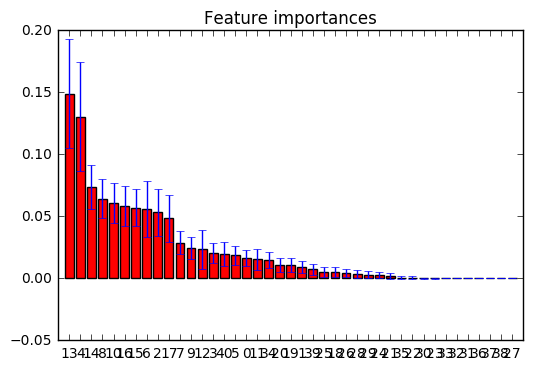

In [49]:
#Dataset with 41 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X.shape[1]), indices)
plt.xlim([-1, df_X.shape[1]])
plt.show()

In [50]:
#Selecting the best 21 features by specifying the threshold
df_X21 = forest.transform(df_X,threshold=0.010096)
df_X21.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(46745, 21)

In [47]:
#Versatile function to measure performance of a model
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [51]:
#Evaluating performance with 41 features
measure_performance(df_X,df_Y,forest)

Accuracy:0.715 

Classification report
             precision    recall  f1-score   support

        <30       0.27      0.66      0.38      6211
         NO       0.93      0.72      0.81     40534

avg / total       0.84      0.71      0.76     46745
 

Confussion matrix
[[ 4105  2106]
 [11224 29310]] 



Feature ranking:
1. feature 12 (0.146977)
2. feature 3 (0.131185)
3. feature 13 (0.082571)
4. feature 7 (0.070595)
5. feature 15 (0.065861)
6. feature 9 (0.064457)
7. feature 14 (0.064171)
8. feature 5 (0.057722)
9. feature 1 (0.054844)
10. feature 16 (0.048690)
11. feature 6 (0.030641)
12. feature 8 (0.026492)
13. feature 11 (0.023295)
14. feature 2 (0.021464)
15. feature 20 (0.020313)
16. feature 4 (0.020019)
17. feature 0 (0.017095)
18. feature 19 (0.016536)
19. feature 10 (0.014775)
20. feature 17 (0.011474)
21. feature 18 (0.010824)


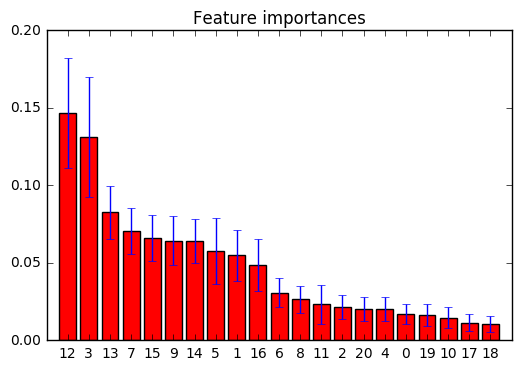

In [52]:
#Dataset with 21 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X21, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X21.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X21.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X21.shape[1]), indices)
plt.xlim([-1, df_X21.shape[1]])
plt.show()

In [78]:
df_X21.shape

(46745, 21)

In [53]:
#Selecting the best 11 features by specifying the threshold
df_X11 = forest.transform(df_X21,threshold=0.0312)
df_X11.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(46745, 10)

In [81]:
df_X21[0:3]

array([[  0,   2,   1,   1,   7,   2,  66,  11,   5,  13,   2,   0,   1, 425,
         69, 700,   6,   2,   1,   1,   1],
       [  2,   3,   1,   1,   7,   2,  66,  44,   1,  16,   0,   0,   0, 520,
         85, 228,   7,   2,   1,   3,   1],
       [  2,   4,   1,   1,   7,   1,  66,  51,   0,   8,   0,   0,   0,  50,
         20,  71,   5,   2,   1,   2,   1]])

In [54]:
#Evaluating performance with 21 features
measure_performance(df_X21,df_Y,forest)

Accuracy:0.722 

Classification report
             precision    recall  f1-score   support

        <30       0.27      0.66      0.39      6211
         NO       0.93      0.73      0.82     40534

avg / total       0.85      0.72      0.76     46745
 

Confussion matrix
[[ 4093  2118]
 [10862 29672]] 



Feature ranking:
1. feature 6 (0.166872)
2. feature 1 (0.147286)
3. feature 7 (0.111829)
4. feature 4 (0.093218)
5. feature 8 (0.088101)
6. feature 9 (0.084896)
7. feature 5 (0.083375)
8. feature 2 (0.066100)
9. feature 0 (0.060109)
10. feature 10 (0.055732)
11. feature 3 (0.042482)


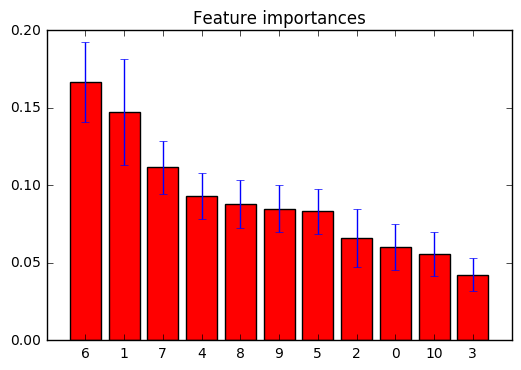

In [102]:
#Dataset with 11 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X11, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X11.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X11.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X11.shape[1]), indices)
plt.xlim([-1, df_X11.shape[1]])
plt.show()

In [103]:
#Evaluating performance with 11 features
measure_performance(df_X11,df_Y,forest)

Accuracy:0.722 

Classification report
             precision    recall  f1-score   support

        <30       0.27      0.65      0.38      6211
         NO       0.93      0.73      0.82     40534

avg / total       0.84      0.72      0.76     46745
 

Confussion matrix
[[ 4052  2159]
 [10825 29709]] 



In [112]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

parameters = {
    'n_estimators': [ 500, 1000, 2000],
    'criterion': ['entropy','gini'],
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,  15,  25],
    'oob_score':['True','False'],
    'class_weight':['balanced_subsample']
}

gs = GridSearchCV(forest, parameters, verbose=1, cv=5)

In [55]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)


In [56]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.967 

Classification report
             precision    recall  f1-score   support

        <30       0.86      0.90      0.88      6211
         NO       0.98      0.98      0.98     40534

avg / total       0.97      0.97      0.97     46745
 

Confussion matrix
[[ 5570   641]
 [  896 39638]] 



In [57]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)

In [58]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.968 

Classification report
             precision    recall  f1-score   support

        <30       0.86      0.90      0.88      6211
         NO       0.98      0.98      0.98     40534

avg / total       0.97      0.97      0.97     46745
 

Confussion matrix
[[ 5594   617]
 [  891 39643]] 



In [59]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=2000,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)

In [60]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.968 

Classification report
             precision    recall  f1-score   support

        <30       0.87      0.90      0.88      6211
         NO       0.98      0.98      0.98     40534

avg / total       0.97      0.97      0.97     46745
 

Confussion matrix
[[ 5596   615]
 [  861 39673]] 



## Support Vector machine classifier 

In [61]:
#Normalizing the input data using z-score normalization
from sklearn.preprocessing import scale

#fit and transform the data
df_XNorm= scale(df_X, axis=0, with_mean=True, with_std=True, copy=True)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_XNorm[0:5]

array([[-1.73, -0.95, -2.56, -0.74, -0.47,  0.36, -0.76,  0.91, -1.59,  1.99,
        -0.32,  1.89, -0.18,  1.61,  0.73, -1.27,  2.68, -0.62,  0.04,  0.21,
        -0.48, -0.1 , -0.08, -0.03, -0.21,  2.4 , -0.31, -0.02, -0.27, -0.25,
        -0.05, -0.01, -0.  , -0.02, -0.5 , -0.08, -0.01, -0.01, -0.  ,  0.89,
         0.58],
       [ 0.22,  1.06, -1.92, -0.74, -0.47,  0.36, -0.76,  0.91,  0.08, -0.27,
         0.04, -0.25, -0.18, -0.26,  1.37, -1.16, -0.14, -0.11,  0.04,  0.21,
        -0.48, -0.1 , -0.08, -0.03, -0.21, -0.34, -0.31, -0.02, -0.27, -0.25,
        -0.05, -0.01, -0.  , -0.02,  2.03, -0.08, -0.01, -0.01, -0.  , -1.13,
         0.58],
       [ 0.22,  1.06, -1.29, -0.74, -0.47,  0.36, -1.11,  0.91,  0.43, -0.83,
        -0.9 , -0.25, -0.18, -0.26, -1.79, -1.62, -1.08, -1.14,  0.04,  0.21,
        -0.48, -0.1 , -0.08, -0.03, -0.21,  2.4 , -0.31, -0.02, -0.27, -0.25,
        -0.05, -0.01, -0.  , -0.02,  0.77, -0.08, -0.01, -0.01, -0.  , -1.13,
         0.58],
       [ 0.22,  

In [47]:
#Build the training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_XNorm, df_Y, test_size=0.2, random_state=33)


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
X_train[0:3]

array([[-1.73,  1.06, -2.56, -0.74, -0.47,  0.36, -0.76,  0.91, -0.38, -0.83,
        -1.37, -0.25, -0.18, -0.26, -1.46, -1.23, -0.15, -1.66,  0.04,  0.21,
        -0.48, -0.1 , -0.08, -0.03, -0.21, -0.34,  2.52, -0.02, -0.27, -0.25,
        -0.05, -0.01, -0.  , -0.02, -0.5 , -0.08, -0.01, -0.01, -0.  ,  0.89,
         0.58],
       [ 0.22,  1.06, -1.29, -0.74, -0.47,  0.36,  0.26,  0.91, -0.22, -0.83,
        -1.02, -0.25, -0.18, -0.26,  0.87, -1.26, -0.12,  0.41,  0.04,  0.21,
         1.72, -0.1 , -0.08, -0.03, -0.21, -0.34, -0.31, -0.02,  3.4 , -0.25,
        -0.05, -0.01, -0.  , -0.02, -0.5 , -0.08, -0.01, -0.01, -0.  , -1.13,
         0.58],
       [ 0.22, -0.95,  1.88, -0.74, -0.1 ,  0.36, -0.08,  0.91,  0.28,  0.3 ,
        -0.43, -0.25, -0.18, -0.26,  0.27, -0.9 , -0.15, -0.62,  0.04,  0.21,
        -0.48, -0.1 , -0.08, -0.03, -0.21, -0.34, -0.31, -0.02, -0.27,  3.67,
        -0.05, -0.01, -0.  , -0.02,  0.77, -0.08, -0.01, -0.01, -0.  , -1.13,
         0.58]])

In [51]:
from sklearn.svm import SVC
# create a base classifier used to evaluate a subset of attributes
model = SVC(C=0.9, kernel='linear',class_weight='balanced')
svm = model.fit(X_train, y_train)
svm.coef_

array([[ 0.03,  0.03, -0.19, -0.02, -0.31, -0.02, -0.25, -0.  , -0.06,  0.08,
        -0.  , -0.1 , -0.16, -0.39,  0.05,  0.03, -0.01, -0.14,  0.04, -0.03,
         0.15, -0.04,  0.01,  0.05,  0.02, -0.03, -0.  ,  0.01,  0.02, -0.  ,
        -0.01, -0.02,  0.  ,  0.02,  0.05,  0.02,  0.01,  0.01,  0.  ,  0.01,
        -0.18]])

In [54]:
#Accuracy with training data
measure_performance(X_train, y_train, svm)

Accuracy:0.683 

Classification report
             precision    recall  f1-score   support

        <30       0.21      0.50      0.29      4963
         NO       0.90      0.71      0.80     32433

avg / total       0.81      0.68      0.73     37396
 

Confussion matrix
[[ 2471  2492]
 [ 9362 23071]] 



In [55]:
#Accuracy with testing data
measure_performance(X_test, y_test, svm)

Accuracy:0.688 

Classification report
             precision    recall  f1-score   support

        <30       0.22      0.51      0.30      1248
         NO       0.90      0.72      0.80      8101

avg / total       0.81      0.69      0.73      9349
 

Confussion matrix
[[ 634  614]
 [2301 5800]] 



Feature selection using Recursive Feature elimination

In [49]:
from sklearn import feature_selection
from sklearn.svm import SVC
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
model = SVC(C=0.9, kernel='linear',class_weight='balanced')
# create the RFE model
rfe = feature_selection.RFE(model,20,step=1)
X_train_fs = rfe.fit_transform(X_train, y_train)
# summarize the selection of the attributes
print("Num Features: ",rfe.n_features_)
print("Selected Features: \n ", rfe.support_)
print("Feature Ranking: \n", rfe.ranking_)

Num Features:  20
Selected Features: 
  [ True  True  True False  True False  True False  True  True False  True  True
  True  True  True False  True  True  True  True  True False  True False False
 False False False False False False False False  True False False False False
 False  True]
Feature Ranking: 
 [ 1  1  1  6  1  3  1 22  1  1 21  1  1  1  1  1 11  1  1  1  1  1 10  1  7  2
 20 13  8 18 16  9 17  5  1  4 12 15 19 14  1]


In [50]:
print(X_train_fs)

[[-1.73  1.06 -2.56 ..., -0.03 -0.5   0.58]
 [ 0.22  1.06 -1.29 ..., -0.03 -0.5   0.58]
 [ 0.22 -0.95  1.88 ..., -0.03  0.77  0.58]
 ..., 
 [ 0.22  1.06  1.25 ..., -0.03  2.03  0.58]
 [ 0.22  1.06 -0.65 ..., -0.03 -0.5   0.58]
 [ 0.22 -0.95  1.25 ..., -0.03 -0.5  -1.72]]


In [53]:
#Evaluate performance with the new feature set
model = SVC(C=0.9, kernel='linear',class_weight='balanced')
svm = model.fit(X_train_fs, y_train)

#measure performance for training data with 20 best features for the model
measure_performance(X_train_fs, y_train, svm)

Accuracy:0.685 

Classification report
             precision    recall  f1-score   support

        <30       0.21      0.50      0.29      4963
         NO       0.90      0.71      0.80     32433

avg / total       0.81      0.68      0.73     37396
 

Confussion matrix
[[ 2460  2503]
 [ 9288 23145]] 



In [54]:
X_test_fs = rfe.transform(X_test)
measure_performance(X_test_fs, y_test, svm)

Accuracy:0.693 

Classification report
             precision    recall  f1-score   support

        <30       0.22      0.51      0.31      1248
         NO       0.91      0.72      0.80      8101

avg / total       0.81      0.69      0.74      9349
 

Confussion matrix
[[ 635  613]
 [2258 5843]] 



In [55]:
#Evaluate performance with the new feature set -- with C=1
model = SVC(kernel='linear',class_weight='balanced')
svm = model.fit(X_train_fs, y_train)

#measure performance for training data with 20 best features for the model
measure_performance(X_train_fs, y_train, svm)

Accuracy:0.685 

Classification report
             precision    recall  f1-score   support

        <30       0.21      0.50      0.29      4963
         NO       0.90      0.71      0.80     32433

avg / total       0.81      0.68      0.73     37396
 

Confussion matrix
[[ 2460  2503]
 [ 9286 23147]] 



## Naive Bayes Classifer

In [104]:
#Build the training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=33)

In [105]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
# create a base classifier used with 41 attributes
clf = clf.fit(X_train, y_train)

In [106]:
measure_performance(X_train, y_train,clf)

Accuracy:0.653 

Classification report
             precision    recall  f1-score   support

        <30       0.16      0.40      0.23      4963
         NO       0.88      0.69      0.78     32433

avg / total       0.79      0.65      0.70     37396
 

Confussion matrix
[[ 1972  2991]
 [ 9999 22434]] 



In [107]:
measure_performance(X_test, y_test,clf)

Accuracy:0.663 

Classification report
             precision    recall  f1-score   support

        <30       0.17      0.40      0.24      1248
         NO       0.88      0.70      0.78      8101

avg / total       0.79      0.66      0.71      9349
 

Confussion matrix
[[ 501  747]
 [2402 5699]] 



In [108]:
from sklearn import feature_selection
from sklearn.naive_bayes import MultinomialNB
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
clf = MultinomialNB()
# create the RFE model
rfe = feature_selection.RFE(clf,20,step=1)
X_train_fs = rfe.fit_transform(X_train, y_train)
# summarize the selection of the attributes
print("Num Features: ",rfe.n_features_)
print("Selected Features: \n ", rfe.support_)
print("Feature Ranking: \n", rfe.ranking_)

Num Features:  20
Selected Features: 
  [False  True False False False False False False False False False  True  True
  True False False False False False False False  True  True  True  True False
 False  True False  True  True  True  True  True False  True  True  True  True
  True  True]
Feature Ranking: 
 [ 8  1 15 11 12 14 13 19 18  7 17  1  1  1 22 21 20 16 10  9  5  1  1  1  1  4
  3  1  2  1  1  1  1  1  6  1  1  1  1  1  1]


In [109]:
print(X_train_fs)

[[1 0 0 ..., 0 1 1]
 [1 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 ..., 
 [1 0 1 ..., 0 0 1]
 [1 0 0 ..., 0 1 1]
 [0 0 0 ..., 0 1 0]]


In [110]:
#Evaluate performance with the new feature set - 20 features
clf = MultinomialNB()
nb = clf.fit(X_train_fs, y_train)

#measure performance for training data with 20 best features for the model
measure_performance(X_train_fs, y_train, nb)

Accuracy:0.860 

Classification report
             precision    recall  f1-score   support

        <30       0.38      0.09      0.15      4963
         NO       0.88      0.98      0.92     32433

avg / total       0.81      0.86      0.82     37396
 

Confussion matrix
[[  448  4515]
 [  723 31710]] 



In [111]:
X_test_fs = rfe.transform(X_test)
measure_performance(X_test_fs, y_test, nb)

Accuracy:0.861 

Classification report
             precision    recall  f1-score   support

        <30       0.42      0.10      0.16      1248
         NO       0.88      0.98      0.92      8101

avg / total       0.81      0.86      0.82      9349
 

Confussion matrix
[[ 122 1126]
 [ 169 7932]] 



## Decision tree classifier -- Evaluating model and feature importances

In [56]:
#Dataset with 41 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.192168)
2. feature 13 (0.179111)
3. feature 14 (0.107953)
4. feature 15 (0.071732)
5. feature 8 (0.058627)
6. feature 10 (0.050758)
7. feature 16 (0.048692)
8. feature 6 (0.047245)
9. feature 17 (0.045900)
10. feature 2 (0.035766)
11. feature 7 (0.026653)
12. feature 40 (0.019437)
13. feature 34 (0.017214)
14. feature 0 (0.015215)
15. feature 9 (0.013409)
16. feature 5 (0.013262)
17. feature 12 (0.009605)
18. feature 1 (0.009497)
19. feature 3 (0.008900)
20. feature 19 (0.008898)
21. feature 11 (0.004231)
22. feature 26 (0.004041)
23. feature 28 (0.003796)
24. feature 25 (0.002239)
25. feature 35 (0.001942)
26. feature 29 (0.001876)
27. feature 18 (0.001295)
28. feature 39 (0.000537)
29. feature 38 (0.000000)
30. feature 37 (0.000000)
31. feature 33 (0.000000)
32. feature 36 (0.000000)
33. feature 31 (0.000000)
34. feature 32 (0.000000)
35. feature 30 (0.000000)
36. feature 27 (0.000000)
37. feature 21 (0.000000)
38. feature 22 (0.000000)
39. feature 23

In [57]:
#Selecting the best 21 features by specifying the threshold
df_X21 = dt.transform(df_X,threshold=0.004233)
df_X21.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(46745, 20)

In [58]:
measure_performance(df_X,df_Y,dt)

Accuracy:0.650 

Classification report
             precision    recall  f1-score   support

        <30       0.23      0.68      0.34      6211
         NO       0.93      0.65      0.76     40534

avg / total       0.84      0.65      0.71     46745
 

Confussion matrix
[[ 4240  1971]
 [14374 26160]] 



In [59]:
#Dataset with best 21 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X21, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X21.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.190866)
2. feature 12 (0.178653)
3. feature 13 (0.106856)
4. feature 14 (0.078936)
5. feature 8 (0.063980)
6. feature 10 (0.053891)
7. feature 15 (0.050461)
8. feature 16 (0.049292)
9. feature 6 (0.046975)
10. feature 2 (0.034445)
11. feature 7 (0.027725)
12. feature 19 (0.020745)
13. feature 18 (0.017178)
14. feature 0 (0.015996)
15. feature 9 (0.013375)
16. feature 5 (0.013228)
17. feature 3 (0.009591)
18. feature 1 (0.009473)
19. feature 11 (0.009458)
20. feature 17 (0.008875)


In [62]:
#Selecting the best 10 features by specifying the threshold
df_X10 = dt.transform(df_X21,threshold=0.027725)
df_X10.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(46745, 11)

In [63]:
measure_performance(df_X21,df_Y,dt)

Accuracy:0.652 

Classification report
             precision    recall  f1-score   support

        <30       0.23      0.68      0.34      6211
         NO       0.93      0.65      0.76     40534

avg / total       0.84      0.65      0.71     46745
 

Confussion matrix
[[ 4247  1964]
 [14290 26244]] 



In [64]:
#Dataset with best 10 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X10, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X10.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.208148)
2. feature 6 (0.195641)
3. feature 7 (0.127189)
4. feature 8 (0.076570)
5. feature 5 (0.071167)
6. feature 9 (0.069871)
7. feature 4 (0.069268)
8. feature 2 (0.055323)
9. feature 10 (0.048330)
10. feature 0 (0.041890)
11. feature 3 (0.036602)


In [65]:
measure_performance(df_X10,df_Y,dt)

Accuracy:0.642 

Classification report
             precision    recall  f1-score   support

        <30       0.22      0.68      0.34      6211
         NO       0.93      0.64      0.75     40534

avg / total       0.83      0.64      0.70     46745
 

Confussion matrix
[[ 4219  1992]
 [14755 25779]] 



In [85]:
from sklearn.grid_search import GridSearchCV

dt = DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': [ 5, 10, 20, 10],
    'min_samples_leaf': [ 5 ,10, 17 ,  30 ],
    'min_samples_split': [ 2, 10,  20],
    'class_weight': ['balanced']
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [86]:
%time _ = gs.fit(df_X21,df_Y)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 21.0min finished


CPU times: user 2min 7s, sys: 1.1 s, total: 2min 8s
Wall time: 21min 2s


({'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 20,
  'min_samples_leaf': 5,
  'min_samples_split': 10},
 0.6332655899026634)

In [87]:
#Dataset with best 21 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=20, min_samples_leaf=5,min_samples_split=10)
dt = dt.fit(df_X21, df_Y)


In [88]:
measure_performance(df_X21, df_Y,dt)

Accuracy:0.787 

Classification report
             precision    recall  f1-score   support

        <30       0.38      0.95      0.54      6211
         NO       0.99      0.76      0.86     40534

avg / total       0.91      0.79      0.82     46745
 

Confussion matrix
[[ 5895   316]
 [ 9618 30916]] 



## PCA for Reduced Dimensionality in Clustering

In [62]:
#Normalizing data using MixMaxScaler 
from sklearn.preprocessing import MinMaxScaler

data_norm = preprocessing.MinMaxScaler().fit(df_X)
df_Xnorm = data_norm.transform(df_X)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_Xnorm[0:5]

array([[ 0.  ,  0.  ,  0.22,  0.  ,  0.  ,  0.25,  0.08,  1.  ,  0.08,  0.83,
         0.15,  0.06,  0.  ,  0.08,  0.65,  0.1 ,  0.97,  0.23,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.67,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.  ,  0.  ,  0.  ,  0.33,  0.33,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ],
       [ 0.4 ,  0.5 ,  0.33,  0.  ,  0.  ,  0.25,  0.08,  1.  ,  0.33,  0.17,
         0.19,  0.  ,  0.  ,  0.  ,  0.79,  0.13,  0.32,  0.31,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ],
       [ 0.4 ,  0.5 ,  0.44,  0.  ,  0.  ,  0.25,  0.  ,  1.  ,  0.38,  0.  ,
         0.09,  0.  ,  0.  ,  0.  ,  0.08,  0.03,  0.1 ,  0.15,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.67,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.  ,  0.  ,  0.  ,  0.67,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ],
       [ 0.4 ,  

So we can see that all the features have been normalized to value between 0 and 1 as by default range is 0 to 1 for sklearn.preprocessing.MinMaxScaler.

In [63]:
#KMeans from scikit-learn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
#Fitting the data
kmeans.fit(df_Xnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 0], dtype=int32)

In [65]:
kmeans.cluster_centers_

array([[ 0.35,  0.23,  0.68,  0.16,  0.09,  0.19,  0.23,  0.65,  0.31,  0.24,
         0.16,  0.01,  0.  ,  0.01,  0.49,  0.38,  0.35,  0.32,  0.67,  0.64,
         0.36,  0.33,  0.33,  0.33,  0.34,  0.35,  0.35,  0.  ,  0.34,  0.34,
         0.  ,  0.  ,  0.  ,  0.  ,  0.43,  0.33, -0.  ,  0.  ,  0.  ,  1.  ,
         0.55],
       [ 0.36,  0.24,  0.66,  0.15,  0.09,  0.19,  0.28,  0.65,  0.33,  0.25,
         0.21,  0.01,  0.  ,  0.01,  0.47,  0.37,  0.35,  0.33,  0.66,  0.61,
         0.46,  0.34,  0.34,  0.33,  0.36,  0.4 ,  0.39,  0.  ,  0.38,  0.37,
         0.  ,  0.  ,  0.  ,  0.  ,  0.51,  0.34,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ]])

In [66]:
#Converting cluster centers array to dataframe and trasposing it so that features are rows and clusters are columns
#Providing it with column_names (features) as 'index' and Cluster Names as 'columns'

pd.DataFrame(kmeans.cluster_centers_.T, index=df_X.columns, columns=['Cluster 1', 'Cluster 2'])

,Cluster 1,Cluster 2
race,3.54596e-01,3.55635e-01
gender,2.30772e-01,2.43365e-01
age,6.76645e-01,6.62214e-01
admission_type_id,1.55960e-01,1.54342e-01
discharge_disposition_id,9.26833e-02,9.34830e-02
admission_source_id,1.87122e-01,1.88356e-01
time_in_hospital,2.26125e-01,2.78052e-01
medical_specialty,6.46341e-01,6.46642e-01
num_lab_procedures,3.05719e-01,3.30185e-01
num_procedures,2.41920e-01,2.50918e-01


In [67]:
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(df_Yarray, kmeans.labels_)
homogeneity = homogeneity_score(df_Yarray, kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.000493587775882
Homogeneity of Clusters: 0.000864396580773


## PCA on the normalized data

In [68]:
#PCA Using scikit-learn
from sklearn import decomposition
pca = decomposition.PCA(n_components=20)
DTtrans = pca.fit(df_Xnorm).transform(df_Xnorm)

In [69]:
np.set_printoptions(precision=2,suppress=True)
print (DTtrans)

[[ 0.22 -0.32  0.37 ...,  0.19  0.12  0.24]
 [-0.63 -0.35  0.05 ..., -0.02  0.04 -0.04]
 [-0.61 -0.32 -0.01 ...,  0.06 -0.1   0.22]
 ..., 
 [-0.59 -0.42 -0.35 ...,  0.05  0.17  0.02]
 [-0.65 -0.38  0.01 ..., -0.07 -0.16 -0.03]
 [ 0.82 -0.4  -0.34 ...,  0.17  0.2   0.  ]]


In [70]:
print(pca.explained_variance_ratio_)

[ 0.25  0.11  0.08  0.07  0.05  0.04  0.04  0.04  0.04  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.01  0.01  0.01  0.01]


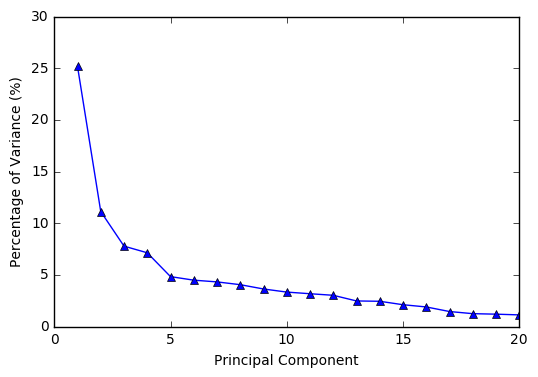

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [72]:
pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 25.1752946946
Variance captured by PC 2: 36.3002413637
Variance captured by PC 3: 44.0768804118
Variance captured by PC 4: 51.2106911995
Variance captured by PC 5: 56.0379097835
Variance captured by PC 6: 60.5220069098
Variance captured by PC 7: 64.8377857166
Variance captured by PC 8: 68.8848833297
Variance captured by PC 9: 72.5154426966
Variance captured by PC 10: 75.8460689961
Variance captured by PC 11: 79.0170093558
Variance captured by PC 12: 82.0366106276
Variance captured by PC 13: 84.5094480879
Variance captured by PC 14: 86.9500781956
Variance captured by PC 15: 89.0575258944
Variance captured by PC 16: 90.948927752
Variance captured by PC 17: 92.397717958
Variance captured by PC 18: 93.6397881978
Variance captured by PC 19: 94.8330831774
Variance captured by PC 20: 95.9558017707


### Performing kmeans again with PCA reduced data:

In [73]:
kmeans = KMeans(n_clusters=2) #Number of clusters = 7)

#Fitting the data
kmeans.fit(DTtrans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [75]:
kmeans.cluster_centers_

array([[-0.6 , -0.01, -0.15, -0.03, -0.  , -0.01, -0.01,  0.01,  0.  , -0.  ,
         0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ],
       [ 0.48,  0.01,  0.11,  0.03,  0.  ,  0.01,  0.01, -0.01, -0.  ,  0.  ,
        -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ]])

In [76]:
#Converting cluster centers array to dataframe and trasposing it so that features are rows and clusters are columns
#Providing it with column_names (features) as 'index' and Cluster Names as 'columns'

pd.DataFrame(kmeans.cluster_centers_.T, index=['PC 1','PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7','PC 8','PC 9','PC 10','PC 11', 'PC 12', 'PC 13', 'PC 14','PC15','PC16','PC17','PC18','PC19','PC20'], columns=['Cluster 1', 'Cluster 2'])

,Cluster 1,Cluster 2
PC 1,-0.60371,0.47613
PC 2,-0.00876,0.00691
PC 3,-0.14553,0.11477
PC 4,-0.03206,0.02529
PC 5,-0.00047,0.00037
PC 6,-0.00775,0.00611
PC 7,-0.00704,0.00555
PC 8,0.00827,-0.00652
PC 9,0.00003,-0.00003
PC 10,-0.00070,0.00056


In [77]:
completeness = completeness_score(df_Yarray, kmeans.labels_)
homogeneity = homogeneity_score(df_Yarray, kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.000493587775882
Homogeneity of Clusters: 0.000864396580773
